<a href="https://colab.research.google.com/github/vicctoriia/census_income/blob/main/census_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Cleaning

Esse projeto foi inspirado nesse [vídeo](https://www.youtube.com/watch?v=V0u6bxQOUJ8). O dataset foi disponibilizado [aqui](https://github.com/aprilypchen/depy2016/blob/master/adult.csv) pela palestrante! 


O dataset é bem famoso e você pode encontrar todos os seus detalhes [aqui](http://archive.ics.uci.edu/ml/datasets/Adult). **Vou me ater ao objetivo inicial com que ele foi proposto, isto é, um exercício de classificação cujo foco é identificar de acordo com as variáveis disponíveis ganha ou não mais de 50k por ano!**


# Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [2]:
# Importa bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Carregando os dados

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/aprilypchen/depy2016/master/adult.csv', na_values=['#NAME?'])

# Analisando a estrutura do dataset

In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,NaN,0,0,40,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(5000, 15)

In [6]:
df.isnull().sum()

age                48
workclass           0
fnlwgt            107
education           0
education_num      57
marital_status      0
occupation          0
relationship        0
race              264
sex                47
capital_gain        0
capital_loss        0
hours_per_week      0
native_country      0
income              0
dtype: int64

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4952 non-null   float64
 1   workclass       5000 non-null   object 
 2   fnlwgt          4893 non-null   float64
 3   education       5000 non-null   object 
 4   education_num   4943 non-null   float64
 5   marital_status  5000 non-null   object 
 6   occupation      5000 non-null   object 
 7   relationship    5000 non-null   object 
 8   race            4736 non-null   object 
 9   sex             4953 non-null   object 
 10  capital_gain    5000 non-null   int64  
 11  capital_loss    5000 non-null   int64  
 12  hours_per_week  5000 non-null   int64  
 13  native_country  5000 non-null   object 
 14  income          5000 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 586.1+ KB


# Pré-Processamento (Data Cleaning)

In [9]:
df['income'].value_counts()

<=50K    3779
>50K     1221
Name: income, dtype: int64

In [10]:
#Vamos começar transformando a variável target 'renda' (income)
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0}) 

In [11]:
#Pronto, agora vamos separar os DataFrames, um com a variável target e outro com as variáveis explicativas:
X = df.drop('income', axis = 1) 
y = df.income

In [12]:
#Vamos dar uma olhada nas outras variáveis:
print(X.head())

    age         workclass  ...  hours_per_week native_country
0  39.0         State-gov  ...              40  United-States
1  50.0  Self-emp-not-inc  ...              13  United-States
2  38.0           Private  ...              40  United-States
3  53.0           Private  ...              40  United-States
4  28.0           Private  ...              40           Cuba

[5 rows x 14 columns]


In [13]:
# São bastante categorias, vamos tentar escolher apenas aquelas relevantes para o modelo?
# Criando um loop para revisitar categoria por categoria. Já vimos pela função df.info() quais eram classificadas como objetos
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' tem {unique_cat} categorias únicas".format(col_name=col_name, unique_cat=unique_cat))

Feature 'workclass' tem 8 categorias únicas
Feature 'education' tem 17 categorias únicas
Feature 'marital_status' tem 7 categorias únicas
Feature 'occupation' tem 15 categorias únicas
Feature 'relationship' tem 6 categorias únicas
Feature 'race' tem 6 categorias únicas
Feature 'sex' tem 3 categorias únicas
Feature 'native_country' tem 40 categorias únicas


In [14]:
#Vamos dar uma olhada em 'native_country' que mais tem categorias:
df['native_country'].value_counts()

United-States                 4465
Mexico                         104
?                               97
Canada                          28
Germany                         22
Philippines                     22
Puerto-Rico                     16
El-Salvador                     16
England                         16
China                           15
Jamaica                         15
Cuba                            14
Dominican-Republic              13
Italy                           12
India                           12
Iran                            11
Taiwan                          10
Vietnam                         10
Guatemala                       10
Japan                            9
South                            9
Poland                           9
Portugal                         7
Haiti                            6
Greece                           6
Columbia                         5
Nicaragua                        5
Ecuador                          4
Ireland             

In [15]:
#Estados Unidos é maioria esmagadora, vamos focar apenas nele e deixar os outros países como 'Outros'.
def clustering(countries):
    if countries == 'United-States':
        return 'United-States'    

    return 'Others'

df['native_country'] = df['native_country'].apply(clustering)

In [16]:
#Lista das variáveis que têm que ser transformadas em dummies
todummy_list = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


In [17]:
#Transformando variáveis em dummies 
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [18]:
X = dummy_df(X, todummy_list)
print(X.head())

    age    fnlwgt  ...  native_country_Vietnam  native_country_Yugoslavia
0  39.0   77516.0  ...                       0                          0
1  50.0   83311.0  ...                       0                          0
2  38.0  215646.0  ...                       0                          0
3  53.0  234721.0  ...                       0                          0
4  28.0  338409.0  ...                       0                          0

[5 rows x 106 columns]


In [19]:
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_?,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,occupation_?,occupation_Adm-clerical,...,native_country_?,native_country_Cambodia,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Honduras,native_country_Hong,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Mexico,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Philippines,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39.0,77516.0,13.0,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50.0,83311.0,13.0,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38.0,215646.0,9.0,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53.0,234721.0,7.0,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28.0,338409.0,13.0,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [21]:
X.isnull().sum() #ainda restam 3 categorias com valores nulos

age                                48
fnlwgt                            107
education_num                      57
capital_gain                        0
capital_loss                        0
                                 ... 
native_country_Thailand             0
native_country_Trinadad&Tobago      0
native_country_United-States        0
native_country_Vietnam              0
native_country_Yugoslavia           0
Length: 106, dtype: int64

In [22]:
#Imputação de dados
from sklearn.impute import SimpleImputer

In [23]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(X)
X = pd.DataFrame(data=imp.transform(X) , columns=X.columns)

In [24]:
X.isnull().sum()

age                               0
fnlwgt                            0
education_num                     0
capital_gain                      0
capital_loss                      0
                                 ..
native_country_Thailand           0
native_country_Trinadad&Tobago    0
native_country_United-States      0
native_country_Vietnam            0
native_country_Yugoslavia         0
Length: 106, dtype: int64

In [25]:
X

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_?,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,occupation_?,occupation_Adm-clerical,...,native_country_?,native_country_Cambodia,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Honduras,native_country_Hong,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Mexico,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Philippines,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,43.0,222971.0,3.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

#Polynomial Features

In [26]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

In [27]:
def add_interactions(df):
# Selecionando o nome das variáveis
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
# Encontrando interações
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
# Removendo interações com valores 0 (não iria trazer nenhuma informação nova)         
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x] 
    df = df.drop(df.columns[noint_indicies], axis=1)
    
    return df

In [28]:
X = add_interactions(X)

In [29]:
X

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_?,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,occupation_?,occupation_Adm-clerical,...,sex_Female_native_country_Vietnam,sex_Female_native_country_Yugoslavia,sex_Male_native_country_?,sex_Male_native_country_Cambodia,sex_Male_native_country_Canada,sex_Male_native_country_China,sex_Male_native_country_Columbia,sex_Male_native_country_Cuba,sex_Male_native_country_Dominican-Republic,sex_Male_native_country_Ecuador,sex_Male_native_country_El-Salvador,sex_Male_native_country_England,sex_Male_native_country_France,sex_Male_native_country_Germany,sex_Male_native_country_Greece,sex_Male_native_country_Guatemala,sex_Male_native_country_Haiti,sex_Male_native_country_India,sex_Male_native_country_Iran,sex_Male_native_country_Ireland,sex_Male_native_country_Italy,sex_Male_native_country_Jamaica,sex_Male_native_country_Japan,sex_Male_native_country_Laos,sex_Male_native_country_Mexico,sex_Male_native_country_Nicaragua,sex_Male_native_country_Outlying-US(Guam-USVI-etc),sex_Male_native_country_Peru,sex_Male_native_country_Philippines,sex_Male_native_country_Poland,sex_Male_native_country_Portugal,sex_Male_native_country_Puerto-Rico,sex_Male_native_country_Scotland,sex_Male_native_country_South,sex_Male_native_country_Taiwan,sex_Male_native_country_Thailand,sex_Male_native_country_Trinadad&Tobago,sex_Male_native_country_United-States,sex_Male_native_country_Vietnam,sex_Male_native_country_Yugoslavia
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

#Feature Selection

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=1)

In [31]:

print(df.shape)
print(X.shape)

(5000, 15)
(5000, 2854)


In [32]:

import sklearn.feature_selection
from sklearn.feature_selection import SelectKBest

select = SelectKBest(k=15) 
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  89   98  194  203  298  307  401  410  488  521  532  538  553  556
  557  647  656  681  709  718  730  777  780  794  814  815  817  818
  901  910  917  918  946  955  960  967  975 1017 1027 1033 1041 1073
 1076 1082 1112 1126 1145 1148 1163 1165 1168 1178 1200 1206 1215 1224
 1228 1238 1239 1248 1258 1274 1275 1357 1360 1366 1379 1382 1385 1398
 1400 1432 1436 1467 1470 1483 1526 1530 1549 1559 1572 1611 1613 1630
 1636 1643 1694 1695 1697 1736 1738 1742 1757 1784 1792 1793 1800 1802
 1804 1837 1840 1842 1843 1845 1854 1856 1858 1859 1861 1863 1874 1914
 1933 1942 1950 1956 1958 1962 1964 2015 2035 2055 2056 2076 2085 2094
 2117 2144 2145 2151 2179 2185 2186 2191 2192 2212 2225 2227 2229 2241
 2242 2248 2249 2251 2262 2274 2278 2301 2334 2337 2338 2342 2345 2348
 2352 2353 2357 2360 2366 2392 2400 2418 2421 2453 2478 2480 2504 2535
 2568 2585 2595 2603 2623 2630 

In [33]:
print(colnames_selected)

['marital_status_Married-civ-spouse', 'relationship_Husband', 'age_education_num', 'age_marital_status_Married-civ-spouse', 'age_relationship_Husband', 'education_num_marital_status_Married-civ-spouse', 'education_num_relationship_Husband', 'hours_per_week_marital_status_Married-civ-spouse', 'hours_per_week_relationship_Husband', 'marital_status_Married-civ-spouse_relationship_Husband', 'marital_status_Married-civ-spouse_race_White', 'marital_status_Married-civ-spouse_sex_Male', 'marital_status_Married-civ-spouse_native_country_United-States', 'relationship_Husband_sex_Male', 'relationship_Husband_native_country_United-States']


#Machine Learning

In [34]:
# Regressão Logística
logreg = LogisticRegression()

In [35]:
# Treinando o modelo
logreg.fit(X_train_selected, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [36]:
# Fazendo a predição! 
y_pred = logreg.predict(X_test_selected)

In [40]:
# acuracia
logreg.score(X_test_selected, y_test)


# outras metricas
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1149
           1       0.66      0.54      0.60       351

    accuracy                           0.83      1500
   macro avg       0.76      0.73      0.74      1500
weighted avg       0.82      0.83      0.82      1500



In [41]:

# matriz de confusao
print(confusion_matrix(y_test, y_pred))

[[1050   99]
 [ 160  191]]


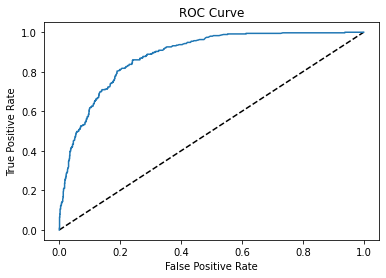

In [38]:
# computa probabilidades
y_pred_prob = logreg.predict_proba(X_test_selected)[:,1]

 #Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [39]:
# calculando AUC
auc = roc_auc_score(y_test, y_pred_prob)

print('AUC: %.3f' % auc)


AUC: 0.882
